In [116]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pickle


# 数据集加载
X,y = load_iris(return_X_y=True)
X = X[:100]
y = y[:100]


# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)
np.savez('test_data.npz', X_test=X_test, y_test=y_test)

# 权重参数
theta = np.random.randn(1,4)
bias = 0
# 超参数
lr = 0.01 # 学习率
epochs = 120 # 训练次数

# 模型计算函数
def forward(X, theta, bias):
    # 线性运算
    z = np.dot(theta, X.T) + bias
    # sigmoid
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

# 损失函数
def loss(y, y_hat):
    e = 1e-8
    return - y*np.log(y_hat + e) - (1 - y) * np.log( 1 - y_hat + e)

# 计算梯度
def calc_gradient(x,y,y_hat):
    m = x.shape[-1]
    delta_theta = np.dot((y_hat - y),x) / m
    delta_bias = np.mean(y_hat - y)
    return delta_theta, delta_bias

# 模型保存
def save_model(filepath, theta, bias):
    model_data = {
        'theta': theta,
        'bias': bias
    }
    with open(filepath, 'wb') as f:
        pickle.dump(model_data, f)


# 绘制损失、准确率曲线
def plot_training_history(loss_arr, acc_arr, figsize=(12, 4), 
                         loss_color='blue', acc_color='green',
                         loss_label='Loss', acc_label='Accuracy',
                         grid=True, show=True):
    plt.figure(figsize=figsize)
    
    # 绘制损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(loss_arr, label=loss_label, color=loss_color)
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    if grid:
        plt.grid(True)
    plt.legend()
    
    # 绘制准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(acc_arr, label=acc_label, color=acc_color)
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    if grid:
        plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    
    if show:
        plt.show()
    


(80, 4) (20, 4)


epoch: 0, loss: 5.902161094285719, acc: 0.525
epoch: 1, loss: 4.122017603928161, acc: 0.525
epoch: 2, loss: 2.344259594670439, acc: 0.525
epoch: 3, loss: 0.7052630249013984, acc: 0.525
epoch: 4, loss: 0.17295063282905537, acc: 1.0
epoch: 5, loss: 0.16445043146147595, acc: 1.0
epoch: 6, loss: 0.15724330296072492, acc: 1.0
epoch: 7, loss: 0.15065731579339098, acc: 1.0
epoch: 8, loss: 0.14459384449127938, acc: 1.0
epoch: 9, loss: 0.13899398414549918, acc: 1.0
epoch: 10, loss: 0.13380773430843548, acc: 1.0
epoch: 11, loss: 0.12899188664137268, acc: 1.0
epoch: 12, loss: 0.12450892321124456, acc: 1.0
epoch: 13, loss: 0.12032612810819358, acc: 1.0
epoch: 14, loss: 0.11641485723113035, acc: 1.0
epoch: 15, loss: 0.11274993501445904, acc: 1.0
epoch: 16, loss: 0.1093091535236719, acc: 1.0
epoch: 17, loss: 0.10607285454545386, acc: 1.0
epoch: 18, loss: 0.10302357930858042, acc: 1.0
epoch: 19, loss: 0.10014577358816754, acc: 1.0
epoch: 20, loss: 0.09742553837989057, acc: 1.0
epoch: 21, loss: 0.0948

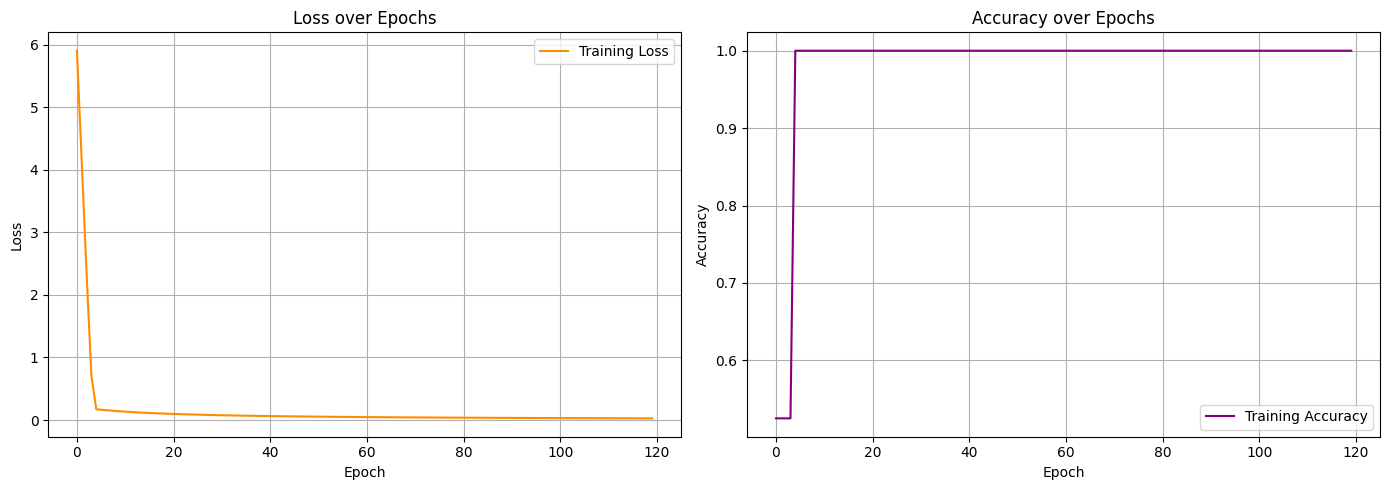

In [117]:
# 模型训练
loss_arr = []
acc_arr = []
for i in range(epochs):
    # 前向计算
    y_hat = forward(X_train,theta,bias)
    # 计算损失
    loss_val = loss(y_train, y_hat)
    # 计算梯度
    delta_theta, delta_bias = calc_gradient(X_train, y_train, y_hat)
    # 更新参数
    theta = theta - lr * delta_theta
    bias = bias - lr * delta_bias
    
    
    acc = np.mean(np.round(y_hat) == y_train)
    print(f"epoch: {i}, loss: {np.mean(loss_val)}, acc: {acc}")
    loss_arr.append(np.mean(loss_val))
    acc_arr.append(acc)

# 保存模型
save_model('my_model.pkl', theta, bias)

%matplotlib inline
plot_training_history(
    loss_arr,
    acc_arr,
    figsize=(14, 5),
    loss_color='darkorange',
    acc_color='purple',
    loss_label='Training Loss',
    acc_label='Training Accuracy'
)